### Workshop 02

In [ ]:
1. Run some program every 30 second

2. Collect some metrics cpu_usage, mem_usage of your machine....

    ?????

3. Save into a csv


# Functions...

In [ ]:
# from datetime import datetime
# str(datetime.now())

# Solution 1

In [ ]:
  !pip install psutil 

In [ ]:
import time
from datetime import datetime
import psutil


fname = r"C:\Users\Li Shuchen\Desktop\scpjt\workshop\cpu_mem.csv"
f = open(fname, mode ="w+")
f.write ("cpu_percent,memory_percent,current_time\n")

while True:
    f = open(fname, mode="a") 
    cpu_percent = str(psutil.cpu_percent())
    memory_percent = str(psutil.virtual_memory()[2])
    current_time = str(datetime.now())
    print (f"{cpu_percent}, {memory_percent}, {current_time}")
    f.write (f"{cpu_percent}, {memory_percent}, {current_time}\n")  
    f.close()
    time.sleep (30)
   

['6.8', '32.2', '2019-09-18 16:23:45.965383']
['4.0', '32.2', '2019-09-18 16:23:48.972762']
['2.3', '32.3', '2019-09-18 16:23:51.980520']
['2.5', '32.3', '2019-09-18 16:23:54.981834']
['2.5', '32.1', '2019-09-18 16:23:57.990751']
['3.3', '32.1', '2019-09-18 16:24:00.997601']
['3.7', '32.1', '2019-09-18 16:24:04.002578']
   cpu_percent  memory_percent                current_time
0          6.8            32.2  2019-09-18 16:23:45.965383
1          4.0            32.2  2019-09-18 16:23:48.972762
2          2.3            32.3  2019-09-18 16:23:51.980520
3          2.5            32.3  2019-09-18 16:23:54.981834
4          2.5            32.1  2019-09-18 16:23:57.990751
5          3.3            32.1  2019-09-18 16:24:00.997601
6          3.7            32.1  2019-09-18 16:24:04.002578


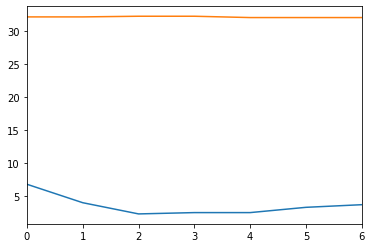

In [21]:
import time
from datetime import datetime
import psutil
import csv
import pandas as pd
import matplotlib.pyplot as plt

def save2csv (row):
    f=open(fname, mode = "a", newline="") 
    csv_writer = csv.writer(f) 
    csv_writer.writerow(row)  # row must be in list
    f.close()

fname = r"C:\Users\Li Shuchen\Desktop\scpjt\workshop\cpu_mem.csv"
f = open(fname, mode ="w+")
save2csv(["cpu_percent", "memory_percent", "current_time"])
t=0

while True:
    row = [str(psutil.cpu_percent()), str(psutil.virtual_memory()[2]), str(datetime.now())] 
    print (row)
    save2csv(row)
    time.sleep (3) 
    t += 3
    if t >= 20:
        break
    
df = pd.read_csv(fname)
print (df.head(30))
df.cpu_percent.plot()
df.memory_percent.plot()

In [22]:
df.head(30)

,cpu_percent,memory_percent,current_time
0,6.8,32.2,2019-09-18 16:23:45.965383
1,4.0,32.2,2019-09-18 16:23:48.972762
2,2.3,32.3,2019-09-18 16:23:51.980520
3,2.5,32.3,2019-09-18 16:23:54.981834
4,2.5,32.1,2019-09-18 16:23:57.990751
5,3.3,32.1,2019-09-18 16:24:00.997601
6,3.7,32.1,2019-09-18 16:24:04.002578


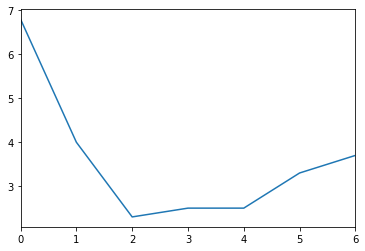

In [23]:
df.cpu_percent.plot()

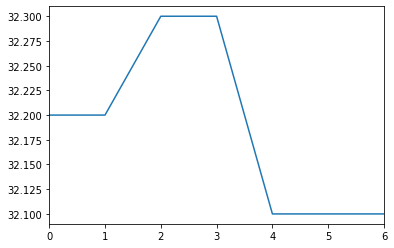

In [24]:
df.memory_percent.plot()

# Solution 2

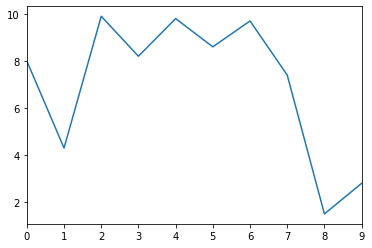

In [9]:
import time
import csv
from datetime import datetime
import psutil
import pandas as pd


def collection_metrics():
    cpu= psutil.cpu_percent()    #cpu is float
    mem= psutil.virtual_memory().percent  # no bracket after percent 
    timestamp = str (datetime.now())
    return (cpu, mem, timestamp)

def save_metrics(row, mode):
    with open ("cpu_mem_time.csv", mode=mode, newline="") as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(row)

def dosth():
    row = collection_metrics()
    save_metrics(row,"a")
    
headrow = ("cpu_percent", "memory_percent", "current_time")
save_metrics(headrow, "w")
t=0

while True:
    dosth()
    time.sleep(2)
    t += 2
    if t >= 20:
        break

df = pd.read_csv("cpu_mem_time.csv")
df.cpu_percent.plot()

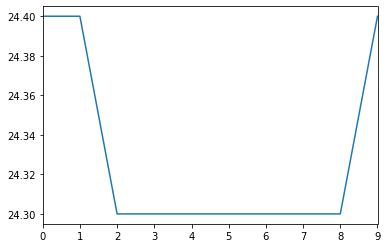

In [10]:
df.memory_percent.plot()